# PRÁCTICA 5 - Ejercicio 14

En el archivo infantesConBajoPesoAlNacer.txt se encuentran los datos correspondientes a
mediciones de 100 niños nacidos con bajo peso en Boston (Labor and deliver characteristics and
the risk of germinal matrix hemorrhage in low birth weight infants. Journal of child neurology,
6(1) , 35-40, (1991))

Llamamos

Y = perímetro cefálico del bebé al nacer, en centrímetros (columna headcirc)

X1 = edad gestacional del bebé al nacer, en semanas (columna gestage)

X2 = peso al nacer del bebé, en gramos (columna birthwt)

Se quiere predecir el perímetro cefálico de un niño al nacer.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv('infantesConBajoPesoAlNacer.txt', sep = ",")
print(datos)

    headcirc   length   gestage   birthwt   momage   toxemia
0         27       41        29      1360       37         0
1         29       40        31      1490       34         0
2         30       38        33      1490       32         0
3         28       38        31      1180       37         0
4         29       38        30      1200       29         1
..       ...      ...       ...       ...      ...       ...
95        26       37        31       820       30         1
96        27       40        29      1150       28         0
97        28       35        32       880       35         1
98        28       41        33      1320       36         1
99        26       38        28      1080       36         0

[100 rows x 6 columns]


In [7]:
datosNP = datos.to_numpy()
x1 = datosNP[:,2]
x2 = datosNP[:,3]
y = datosNP[:,0]

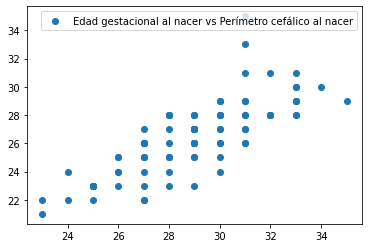

In [9]:
plt.scatter(x1,y,label="Edad gestacional al nacer vs Perímetro cefálico al nacer")
plt.legend()

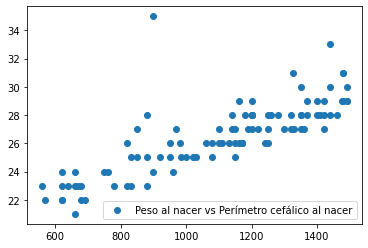

In [10]:
plt.scatter(x2,y,label="Peso al nacer vs Perímetro cefálico al nacer")
plt.legend()

In [11]:
# En ambos casos la relación parece ser lineal.

In [14]:
def minimosCuadrados(x, y):
    n = len(x)
    unos = np.ones(n)
    At = np.array([unos, x])
    A = np.transpose(At)
    AtA = np.dot(At, A)
    Aty = np.dot(At, y)
    s = np.linalg.solve(AtA, Aty)
    p = np.poly1d([s[1], s[0]])
    print(p)
    return(p)
minimosCuadrados(x1,y)

 
0.7801 x + 3.914


poly1d([0.78005316, 3.91426414])

In [20]:
A = np.c_[np.ones(len(x1)),x1,x2]
At=np.transpose(A)
c = np.linalg.solve(At@A,At@y)
print(c)

a = np.linspace(np.min(x1),np.max(x1))
b = np.linspace(np.min(x2),np.max(x2))
xx,yy=np.meshgrid(a,b)



z = c[0]+c[1]*xx+c[2]*yy

# PerímetroCefálico = 8.308 + 0.448*EdadGestacional + 0.005*Peso

[8.30801539e+00 4.48732848e-01 4.71228341e-03]


In [21]:
minimosCuadrados(x2,y) #Mantengo edad cte por lo que el perimetro solo depende del peso.

 
0.007492 x + 18.22


poly1d([7.49184942e-03, 1.82175813e+01])

In [26]:
Per = 0.007492*x2 + 18.22
print(Per)
print("El promedio en el aumento del perímetro encefálico es:",np.mean(Per),"cm")

[28.40912 29.38308 29.38308 27.06056 27.2104  23.31456 22.86504 26.16152
 28.10944 24.43836 24.81296 26.68596 26.76088 28.3342  25.3374  27.36024
 25.56216 29.30816 27.585   27.585   25.11264 25.86184 23.839   29.30816
 26.76088 23.23964 26.8358  25.93676 22.41552 27.65992 24.9628  22.86504
 29.00848 28.3342  26.98564 26.98564 26.98564 28.85864 29.2707  27.2104
 25.48724 27.13548 28.3342  29.15832 22.49044 22.86504 27.2104  23.16472
 27.80976 24.43836 23.31456 23.01488 29.00848 26.8358  24.5882  23.91392
 22.86504 23.16472 25.59962 23.38948 27.2104  28.48404 26.98564 27.2104
 26.4612  29.30816 28.3342  26.91072 28.18436 25.41232 26.31136 25.712
 29.38308 24.81296 28.48404 28.1469  28.7088  27.51008 23.16472 24.06376
 25.3374  24.5882  27.2104  29.00848 26.4612  27.585   28.85864 28.7088
 28.85864 24.9628  26.91072 24.36344 28.78372 27.9596  26.53612 24.36344
 26.8358  24.81296 28.10944 26.31136]
El promedio en el aumento del perímetro encefálico es: 26.452584199999997 cm
